#1.0 Introduction.
The Boston Housing Dataset is a seminal resource in machine learning, offering rich insights into housing dynamics in Boston suburbs. Our project focuses on leveraging this dataset to develop a predictive model for housing prices. Beginning with data exploration, we dissect each feature to discern its significance in property valuation. Subsequently, we engage in feature engineering to refine attributes and align them with underlying data patterns.

Moving forward, we employ advanced machine learning techniques to construct predictive models tailored to the Boston housing market. Through rigorous tuning and evaluation, our aim is to create a model that not only forecasts housing prices accurately but also elucidates the driving factors behind property values.

Beyond prediction, our endeavor seeks to furnish stakeholders with actionable insights for informed decision-making in real estate investment, urban planning, and policymaking realms. By unraveling the complexities of the Boston housing market through data-driven analysis and modeling, we contribute to a deeper understanding of the socioeconomic forces shaping our communities and economies.

#2.0 Importing Libraries.

In [1]:
#Importing and Loading Data.
import numpy as np
import pandas as pd
from google.colab import files

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

#imports from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from google.colab import drive

#3.0 Importing and Getting to Know my Data.

In [ ]:
#Upload the excel file.
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
#Load the excel file as pandas series.
train=pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.shape

(1460, 81)

In [ ]:
# change the column names to lower case
train.columns=map(str.lower,train.columns)

##Deductions.
1. The data has 1460 rows and 81 columns.
2. 3 columns are float datatype, 35 are integer datatype and 43 are object dtype.
3. We have converted all the column names to lower case for easier working.

#4.0 Exploratory Data Analysis (EDA).

##4.1 Exploring Missingness

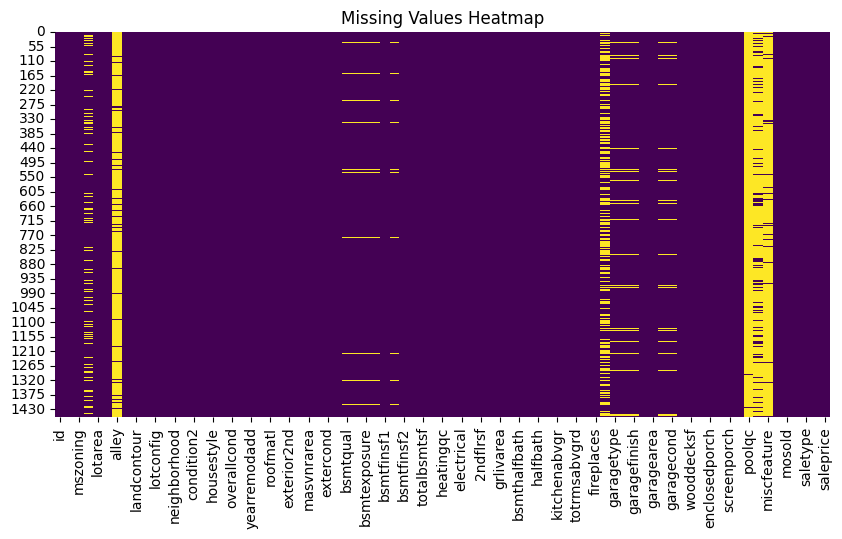

In [ ]:
# Create a heatmap where missing values are represented by yellow lines
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

##Deductions.
1.alley, fireplaces, poolqc, and miscfeature columns have a high number of missing calues.

2.mszoning, bsmtqual, bsmtexposure, bsmntfinsf2, garagetype, garagefinish and garagecond columns have a moderate level of missingness.


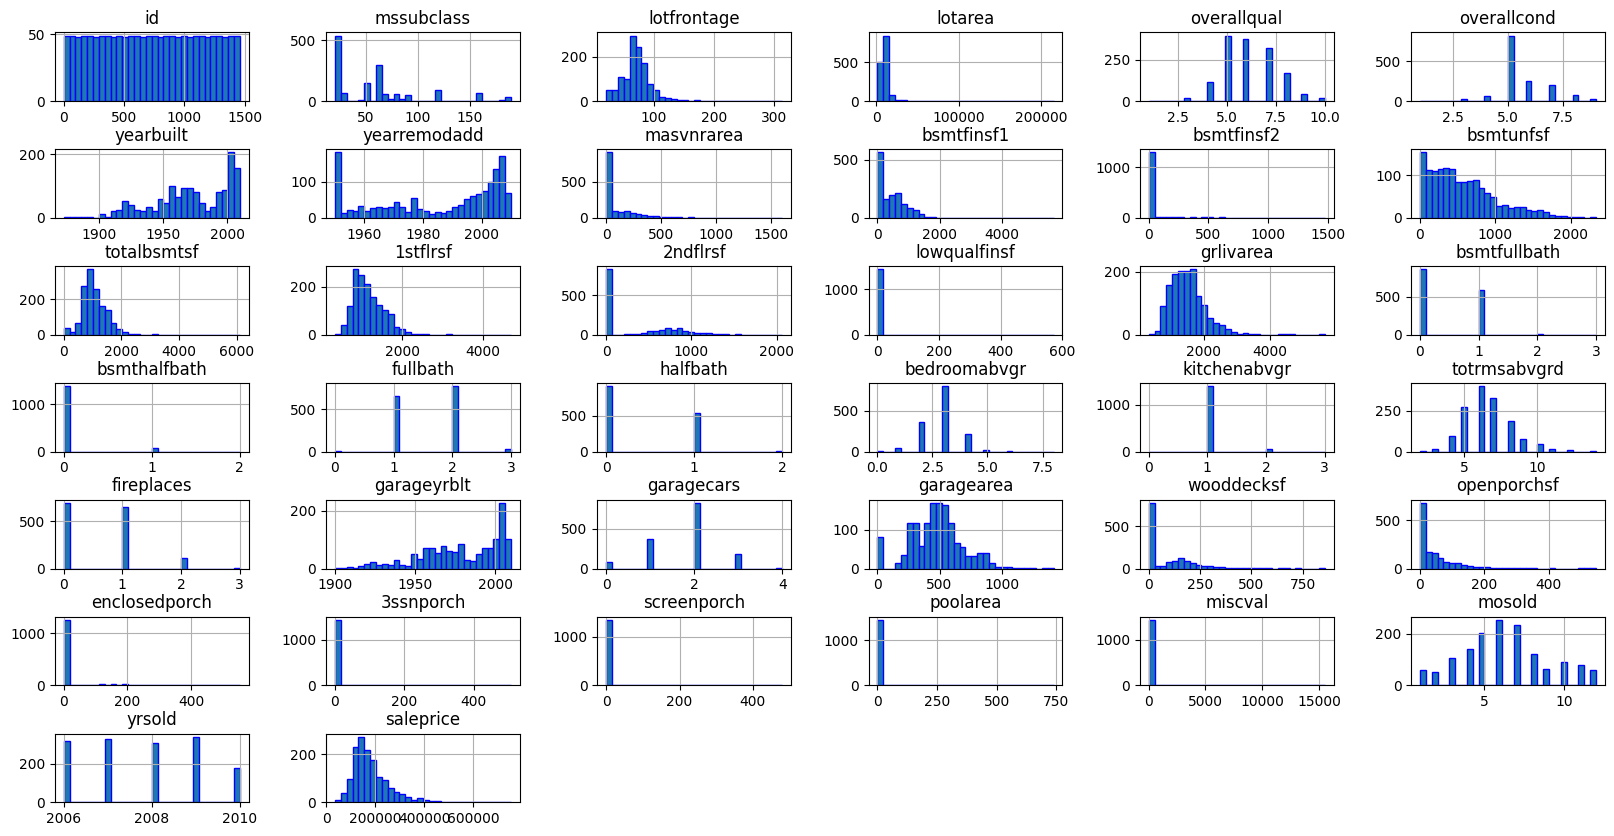

In [ ]:
#Inspecting Distribution of Variables.
train.hist(figsize=(20, 10), bins=30, edgecolor="blue")

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Show the plot
plt.show()

##Deductions.
1. LotFrontage, LotArea, YearBuilt, MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea and saleprice have a normal distribution with presence of outliers.

##4.2 Handling Missing Values.


Handling Missing Numerical Values.

In [ ]:
# Select numerical variables
numerical_values = train.select_dtypes(include=['float64', 'int64'])

numerical_values.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
numerical_values.shape

(1460, 38)

In [ ]:
numerical_values.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Exploring Missingness in Numerical Variables.

In [ ]:
# Check for missing values in each column
numerical_missing_values = numerical_values.isnull().sum()

print(numerical_missing_values)

id                 0
mssubclass         0
lotfrontage      259
lotarea            0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
masvnrarea         8
bsmtfinsf1         0
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
1stflrsf           0
2ndflrsf           0
lowqualfinsf       0
grlivarea          0
bsmtfullbath       0
bsmthalfbath       0
fullbath           0
halfbath           0
bedroomabvgr       0
kitchenabvgr       0
totrmsabvgrd       0
fireplaces         0
garageyrblt       81
garagecars         0
garagearea         0
wooddecksf         0
openporchsf        0
enclosedporch      0
3ssnporch          0
screenporch        0
poolarea           0
miscval            0
mosold             0
yrsold             0
saleprice          0
dtype: int64


##Deductions.
1. There are 38 numerical columns in our data.
2. The column LotFrontage has 259 missing values, masvnrarea 8 missing  and GarageYrBlt, 81 missing values, from a total possible 1460 values.
3. It is suitable to impute the mean in place of the missing values in the LotFrontage and masvnrarea columns, because the variables have normal distribution.
4. It is suitable to impute the median for missing values in GarageYrBlt, because of many outliers.


Handling Missingness in Discrete Numerical variables.

In [ ]:
# Impute missing values in 'LotFrontage' with the mean
numerical_values['lotfrontage'].fillna(numerical_values['lotfrontage'].mean(), inplace=True)

In [ ]:
# Impute missing values in 'masvnrarea' with the mean
numerical_values['masvnrarea'].fillna(numerical_values['masvnrarea'].mean(), inplace=True)

In [ ]:
# Impute missing values in 'GarageYrBlt' with the median
numerical_values['garageyrblt'].fillna(numerical_values['garageyrblt'].median(), inplace=True)

Handling Missingness in Continous Numerical Variables.
We start by distinguishing discrete variables from continous.

In [ ]:
# # Get the data types of each column
# data_types = train.dtypes

# # Identify continuous and discrete variables based on unique value count
# continuous_variables = []
# discrete_variables = []

# for col in train .columns:
#     unique_count = train[col].nunique()
#     if data_types[col] != 'object':
#         if unique_count > 30:  # We set the threshold at 20.
#             continuous_variables.append(col)
#         else:
#             discrete_variables.append(col)

# # Print the lists of continuous and discrete variables
# print("Continuous Variables:")
# print(continuous_variables)

# print("\nDiscrete Variables:")
# print(discrete_variables)

Exploring Missingess in Categorical Variables.

In [ ]:
# Select categorical variables
categorical_variables = train.select_dtypes(include=['object'])
categorical_variables.head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
categorical_variables.columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [ ]:
categorical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mszoning       1460 non-null   object
 1   street         1460 non-null   object
 2   alley          91 non-null     object
 3   lotshape       1460 non-null   object
 4   landcontour    1460 non-null   object
 5   utilities      1460 non-null   object
 6   lotconfig      1460 non-null   object
 7   landslope      1460 non-null   object
 8   neighborhood   1460 non-null   object
 9   condition1     1460 non-null   object
 10  condition2     1460 non-null   object
 11  bldgtype       1460 non-null   object
 12  housestyle     1460 non-null   object
 13  roofstyle      1460 non-null   object
 14  roofmatl       1460 non-null   object
 15  exterior1st    1460 non-null   object
 16  exterior2nd    1460 non-null   object
 17  masvnrtype     1452 non-null   object
 18  exterqual      1460 non-null

In [ ]:
# Check for missing values in each column
categorical_missing_values = categorical_variables.isnull().sum()

print(categorical_missing_values)

mszoning            0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
exterqual           0
extercond           0
foundation          0
bsmtqual           37
bsmtcond           37
bsmtexposure       38
bsmtfintype1       37
bsmtfintype2       38
heating             0
heatingqc           0
centralair          0
electrical          1
kitchenqual         0
functional          0
fireplacequ       690
garagetype         81
garagefinish       81
garagequal         81
garagecond         81
paveddrive          0
poolqc           1453
fence            1179
miscfeature      1406
saletype            0
salecondition       0
dtype: int64


##Deductions.
1. 43 columns are categorical.
2. The columns alley, poolqc, fence and miscfeature have a high degree of missingness.
3. It will be suitable to drop these columns to avoid bias in our model.
4. The columns bsmtqual,bsmtcond, bsmtexposure, bsmtfintype, bsmtfintype2, electrical, fireplacequ, garagetype, garagefinish, garagequal, garagecond, all have missing values where we shall impute the mode.   

In [ ]:
categorical_variables.columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [ ]:
columns_to_impute_mode = ['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
                           'electrical', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond']

# Impute mode in the specified columns
for column in columns_to_impute_mode:
    train[column].fillna(train[column].mode()[0], inplace=True)

categorical_variables.head()


,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

## Deductions.
1. All the missing values have been dealt with.

##4.3 Exploring Outliers.

In [ ]:
print(train.describe())


                id   mssubclass  lotfrontage        lotarea  overallqual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       overallcond    yearbuilt  yearremodadd   masvnrarea   bsmtfinsf1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [ ]:
# # Select numerical columns for boxplot
# numerical_columns = ['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
#                      'masvnrarea', 'bsmtfinsf1', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch',
#                      'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']

# # Create a boxplot
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=train[numerical_columns])
# plt.xticks(rotation=90)
# plt.title('Boxplot of Numerical Variables')
# plt.show()

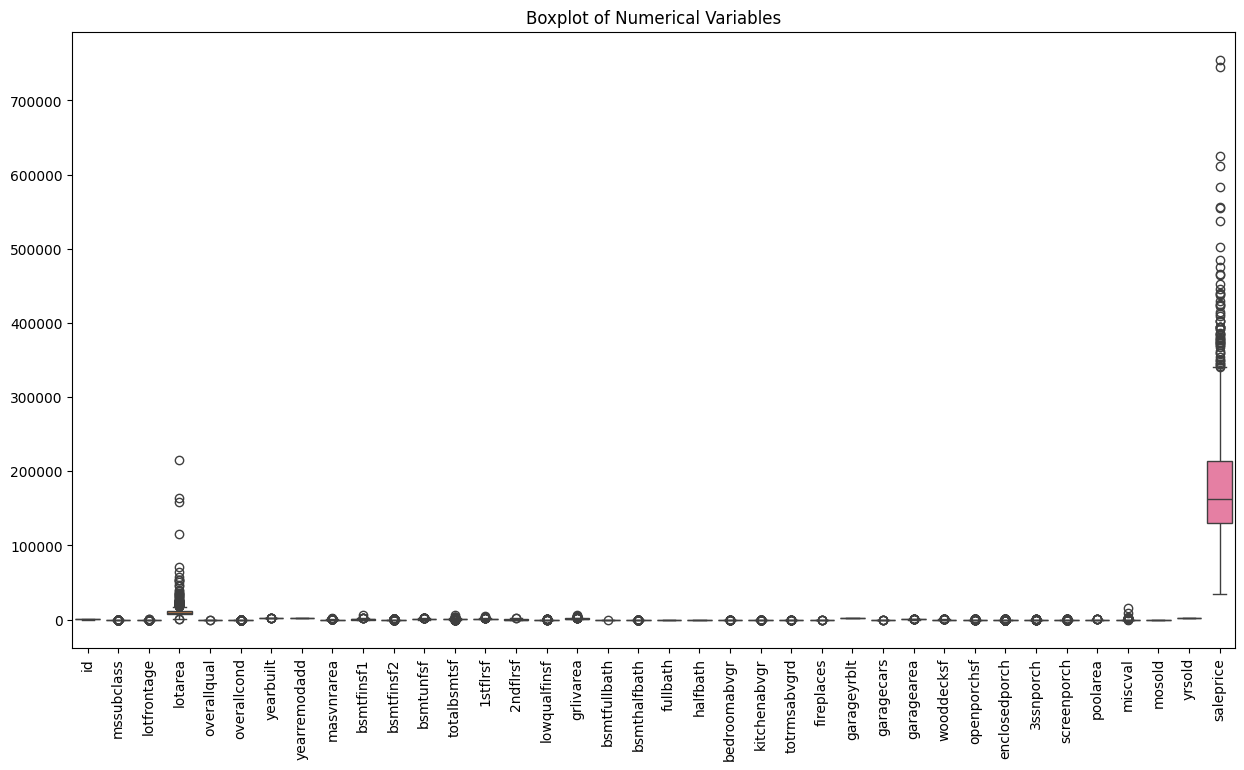

In [ ]:
# Create a boxplot for numerical variables
plt.figure(figsize=(15, 8))
sns.boxplot(data=train.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Variables')
plt.show()

In [ ]:
# Calculate Z-scores
numerical_columns = train.select_dtypes(include='number').columns
z_scores = np.abs(zscore(train[numerical_columns]))

# Identify outliers using a threshold (e.g., 3 standard deviations)
outliers = (z_scores > 3).any(axis=1)

# Display columns with outliers
outlier_columns = numerical_columns[(z_scores > 5).any(axis=0)]

# Display total number of outliers
total_outliers = outliers.sum()

print("Columns with outliers:", outlier_columns)
print("Total number of outliers:", total_outliers)

Columns with outliers: Index(['lotarea', 'bsmtfinsf1', 'bsmtfinsf2', 'totalbsmtsf', '1stflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmthalfbath', 'bedroomabvgr',
       'kitchenabvgr', 'wooddecksf', 'openporchsf', 'enclosedporch',
       '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'saleprice'],
      dtype='object')
Total number of outliers: 423


In [ ]:
train.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Deductions.
1. There are a minimum total of 445 outliers in all the columns.
2. The columns 'lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'totalbsmtsf', '1stflrsf', 'lowqualfinsf', 'grlivarea', 'bsmthalfbath','bedroomabvgr', 'kitchenabvgr', 'wooddecksf', 'openporchsf','enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval' and 'saleprice' all have outliers.
3. Comparing the 75th percentile and maximum values indicates there are some extremely high values.
4. Our earlier intuition that there may be outliers is confirmed.

In [ ]:
# sns.pairplot(train.select_dtypes(include='number'), hue="saleprice", palette="viridis")
# plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
# plt.show()


## Deductions.
1. The pairplots indicate fitting a linear regression model would result in an ineffective model, due to presence of overlapping data points.

#5.0 Feature Scaling.

In [ ]:
#We shall use Robust scaler to accomodate large number of outliers
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_values.drop('saleprice',axis=1))
numerical_robust_scaled = pd.DataFrame(numerical_scaled,columns=numerical_values.drop('saleprice',axis=1).columns)
numerical_robust_scaled.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


## Deductions.
1. All the numerical features have been scaled down, while maintaining original qualities, for easier working.
2. We have effected the RobustScaler, as most of these features do not have a normal distribution, while having many outliers.


#6.0 Feature Encoding.

In [ ]:
categorical_variables.head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
categorical_variables.columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [ ]:
categorical_columns = ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
                        'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl',
                        'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
                        'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair',
                        'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
                        'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature', 'saletype', 'salecondition']

# Perform Label encoding

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column in the DataFrame
for column in categorical_variables.columns:
    categorical_variables[column] = label_encoder.fit_transform(categorical_variables[column])

categorical_variables_encoded = categorical_variables[categorical_columns]


#7.0 Fitting Linear Regression Models.


##7.1 Simple Linear Regression.

In [ ]:
X_numerical = numerical_robust_scaled
X_categorical = categorical_variables_encoded

# Combine numerical and categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)

y = train['saleprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # Create a Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mean_squared_error = mean_squared_error(y_test, y_pred)

r2_score = r2_score(y_test,y_pred)

print(mean_squared_error)
print(r2_score)

# Evaluate the model
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("R-squared:", r2_score(y_test, y_pred))

# # Perform cross-validation
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Convert the scores to positive as sklearn returns negative values for mse
# cv_scores = -cv_scores

# # Display cross-validation scores
# print("Cross-validation scores:", cv_scores)
# print("Mean CV Score:", np.mean(cv_scores))

# # Get feature importance (coefficients)
# feature_importance = lasso.coef_

# # Identify non-zero coefficients (selected features)
# selected_features = X.columns[feature_importance != 0]

# # Subset the data with selected features
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]


1200462904.9432046
0.8434925878617305


##Deductions.
The r_2 score suggests this model is performing well in predictive power.

##7.2 Cross-Validation Modeling

In [ ]:
pipe = make_pipeline(LinearRegression())
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')

print(scores, scores.mean())

[ 8.46486979e-01  8.12077667e-01  8.50600879e-01 -2.97854504e+15
  6.33435053e-01] -595709007408995.0


In [ ]:
X.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,1,1,4,4,2,3,4,4,8,4
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,1,1,4,4,2,3,4,4,8,4
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,1,1,4,4,2,3,4,4,8,4
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,5,2,4,4,2,3,4,4,8,0
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,1,1,4,4,2,3,4,4,8,4


##Deductions.
1. The cross validation scores suggests the performance of the model varies from very good to very poor.
2. The mean score suggests the model in general is performing at a sub-optimal level, which is unsuitable for predictive analysis.

##7.3 Random Forest Regressor.

In [ ]:
model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(scores, scores.mean())

[0.87643779 0.83751882 0.87501384 0.89056104 0.82697338] 0.8613009727975911


##Deductions.
1. The cv scores suggests this model might be overfitted.
2. The mean of the cv scores suggests overfitting as well, this might not be optimal for predictive analysis.
3. from the mean cv score we can see that the data is better fitted for a non-linear model than a linear model.
4. We are not using a scaler because random forest regressor is robust to outliers.

##7.4 Ridge Regression.


In [ ]:
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=1), Ridge(alpha=10))
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')

print(scores, scores.mean())

[0.88298614 0.81338548 0.85320847 0.84843308 0.6695728 ] 0.8135171938111843


##7.5 Lasso Regression

In [ ]:
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=1), Lasso(alpha=100, max_iter=1000))
scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')

print(scores, scores.mean())

[0.87205034 0.81102071 0.85211934 0.84814042 0.67075932] 0.8108180267919147


In [ ]:
# model = Lasso(alpha=10000.1)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Perform cross-validation
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Convert the scores to positive as sklearn returns negative values for mse
# cv_scores = -cv_scores

# # Display cross-validation scores
# print("Cross-validation scores:", cv_scores)
# print("Mean CV Score:", np.mean(cv_scores))


##7.5 Support Vector Machines.

In [ ]:
# Create the NuSVR model with specified parameters
model = NuSVR(C=10000, kernel='rbf', degree=1)

# Perform cross-validation and get R2 scores
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(scores, scores.mean())

[0.61266285 0.78520553 0.61410981 0.70516764 0.72673091] 0.6887753495018462


#8.0 Final Model.

##Deductions.
1. I have selected Random Forest Regressor as my model of choice as it has performed better than the other regression models.
2. We shall introduce hyperparameters to fine tune the model for optimum performance.

##. 8.1 Fine Tuning by Inserting Different Hyperparameters.

In [ ]:
# We increase the number of trees in the forest.
# We increase the depth of maximum depth of the trees to capture more complex relationships. This may however lead to overfitting.
# We increase the minimum number of samples required to split an internal node. Increasing it can prevent overfitting.
# Set a random seed for reproducibility.

model = RandomForestRegressor(n_estimators = 100, max_depth=10, min_samples_split=2, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(scores, scores.mean())

[0.87507643 0.8444335  0.87163309 0.88190236 0.82683841] 0.8599767574173496


In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive
